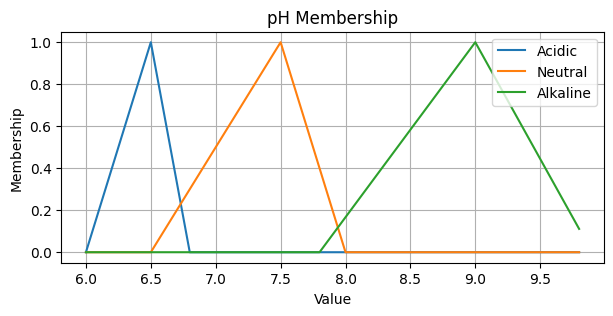

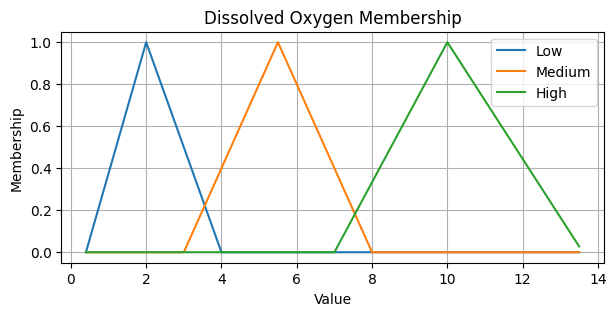

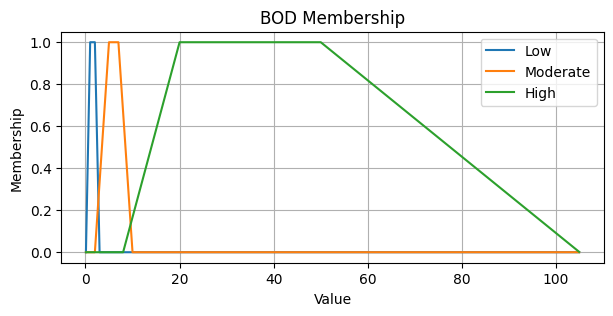

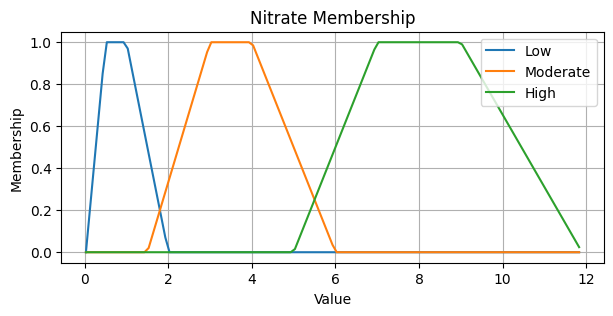

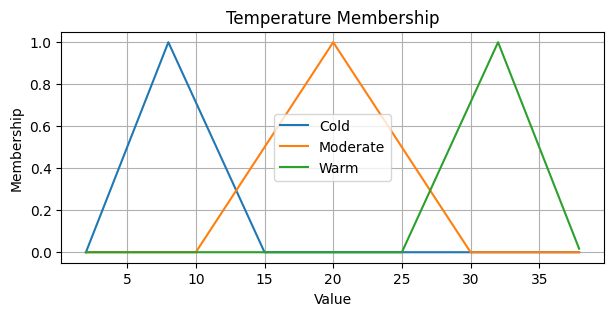

[NbConvertApp] Converting notebook MF_and_Visualization.ipynb to script
[NbConvertApp] Writing 2573 bytes to MF_and_Visualization.py


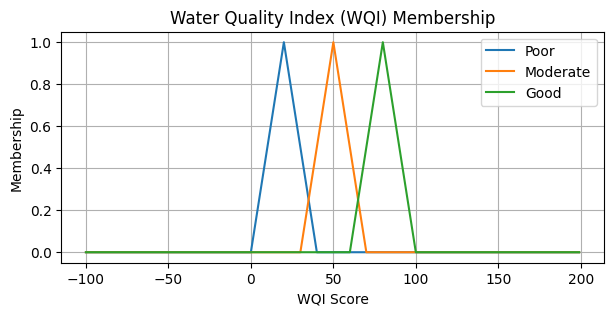

[NbConvertApp] Converting notebook WaterQualitySystem.ipynb to script
[NbConvertApp] Writing 2414 bytes to WaterQualitySystem.py


In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt
from WaterQualitySystem import wqi_simulation

In [2]:
df = pd.read_csv("water_quality_sample.csv")

In [3]:
df.head()

,Temperature (°C),Dissolved Oxygen (mg/L),pH,"Biochemical Oxygen Demand (BOD, mg/L)",Nitrate (mg/L)
0,2.0,8.7,7.3,0.1,0.2
1,8.0,8.5,7.3,0.1,0.2
2,2.0,8.9,7.0,0.1,0.1
3,3.0,8.2,6.9,0.1,0.1
4,5.0,7.6,7.0,0.1,0.1


In [4]:
df.rename(columns={
    "pH": "pH",
    "Dissolved Oxygen (mg/L)": "DO",
    "Biochemical Oxygen Demand (BOD, mg/L)": "BOD",
    "Nitrate (mg/L)": "Nitrate",
    "Temperature (°C)": "Temp"
}, inplace=True)

df["WQI"] = 0  
df["Quality"] = "Unknown"  #

df.loc[0, "DO"]

np.float64(8.7)

In [5]:
df.head()

,Temp,DO,pH,BOD,Nitrate,WQI,Quality
0,2.0,8.7,7.3,0.1,0.2,0,Unknown
1,8.0,8.5,7.3,0.1,0.2,0,Unknown
2,2.0,8.9,7.0,0.1,0.1,0,Unknown
3,3.0,8.2,6.9,0.1,0.1,0,Unknown
4,5.0,7.6,7.0,0.1,0.1,0,Unknown


In [6]:
# Function to calculate Water Quality Index
def calculate_wqi(pH_value, do_value, bod_value, nitrate_value, temp_value):
    wqi_simulation.input['pH'] = pH_value
    wqi_simulation.input['DO'] = do_value
    wqi_simulation.input['BOD'] = bod_value
    wqi_simulation.input['Nitrate'] = nitrate_value
    wqi_simulation.input['Temperature'] = temp_value
    
    # Compute fuzzy logic
    wqi_simulation.compute()
    
    
    # Get the WQI output
    wqi_value = wqi_simulation.output['WQI']
    
    # Determine water quality category
    if wqi_value <= 40:
        quality = 'Poor'
    elif 40 < wqi_value <= 70:
        quality = 'Moderate'
    else:
        quality = 'Good'
    
    return wqi_value, quality


In [8]:
for i in range(1):
    pH_value = df.iloc[i,2] 
    do_value = df.iloc[i,1] 
    bod_value = df.iloc[i,3] 
    nitrate_value = df.iloc[i,4] 
    temp_value = df.iloc[i,0] 

    
    wqi_value, quality = calculate_wqi(pH_value, do_value, bod_value, nitrate_value, temp_value)
    
    # Print result
    print(f"Computed WQI: {wqi_value:.2f}, Water Quality: {quality}")


KeyError: 'WQI'